<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week9/Classification%20model%3A%20SVM%20Classification/MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071
#### MaterialStrength


In [3]:
# Instalasi dan import library yang dibutuhkan
# Library Scikit-learn digunakan untuk membangun dan mengevaluasi model klasifikasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix

* numpy: Untuk operasi numerik.
* pandas: Untuk membaca dan memproses dataset.
* matplotlib.pyplot: Untuk visualisasi, seperti grafik ROC Curve.
* train_test_split: Untuk membagi dataset menjadi data latih dan data uji.
* StandardScaler: Untuk normalisasi fitur numerik.
* SVC: Implementasi Support Vector Classification di Scikit-learn.
* sklearn.metrics: Untuk mengevaluasi performa model klasifikasi.


In [4]:
# Membaca dataset
df = pd.read_csv("/content/sample_data/MaterialStrength.csv")
print("Preview dataset:\n", df.head())  # Melihat beberapa baris pertama dari dataset

Preview dataset:
       x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


* Dataset dibaca dari file CSV, dan 5 baris pertama ditampilkan untuk memastikan data terbaca dengan benar.

In [5]:

# Memeriksa informasi dataset
print("\nInformasi dataset:")
print(df.info())  # Menampilkan tipe data dan jumlah nilai kosong


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ K

* df.info() memberikan informasi tentang dataset, seperti jumlah baris, tipe data di setiap kolom, dan apakah ada data kosong.

In [6]:
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


* Menampilkan semua nama kolom dalam dataset untuk memastikan fitur dan target dipilih dengan benar sebelumnya.

In [7]:
# Pisahkan fitur (X) dan target (y)
# Target di sini harus berupa variabel biner atau kategori
X = df.drop(columns=['x7'])
y = df['x7']

* Kolom x7 diambil sebagai target (label) karena merupakan variabel yang akan diprediksi.
Semua kolom selain x7 digunakan sebagai fitur untuk model.

In [13]:
# Mengonversi target kontinu menjadi kategori biner
threshold = y.median()  # Gunakan median sebagai nilai batas
y = (y >= threshold).astype(int)  # Kelas 1 jika >= median, kelas 0 jika < median

* Target awal adalah nilai numerik kontinu (seperti untuk regresi).
* y.median() menghitung median nilai dari target.
* Nilai target diubah menjadi kategori biner:
  - 1 untuk nilai yang lebih besar atau sama dengan median.
  - 0 untuk nilai yang lebih kecil dari median.

In [14]:
print("\nDistribusi Target Setelah Kategorisasi:")
print(y.value_counts())  # Mengecek distribusi kelas setelah konversi


Distribusi Target Setelah Kategorisasi:
x7
0    515
1    515
Name: count, dtype: int64


* Untuk memastikan pembagian kelas 0 dan 1 tidak terlalu tidak seimbang.


In [15]:
# One-hot encoding untuk fitur non-numerik (jika ada)
X = pd.get_dummies(X, drop_first=True)

* Jika ada kolom kategorikal dalam fitur, konversi kolom ini menjadi representasi numerik menggunakan One-Hot Encoding.
* Parameter drop_first=True digunakan untuk menghindari dummy variable trap.


In [16]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* train_test_split membagi data menjadi dua bagian:
  - 80% untuk data latih.
  - 20% untuk data uji.
* random_state=42 memastikan pembagian data selalu sama di setiap eksekusi.

In [17]:

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Normalisasi digunakan untuk memastikan fitur memiliki skala yang sama, yang penting untuk algoritma seperti SVM.
  - fit_transform: Menghitung statistik pada data latih dan menerapkan transformasi.
  - transform: Menerapkan transformasi yang sama pada data uji.
* Skala data diubah sehingga memiliki rata-rata 0 dan standar deviasi 1.

In [18]:
# Membuat model Support Vector Classifier
model = SVC(kernel='rbf', probability=True, random_state=42)  # Kernel RBF sering digunakan untuk data non-linear
model.fit(X_train, y_train)  # Melatih model dengan data latih

SVC(probability=True, random_state=42)

* SVC adalah implementasi Support Vector Machine untuk klasifikasi.
* Parameter:
  - kernel='rbf': Menggunakan kernel Radial Basis Function (RBF), cocok untuk data non-linear.
  - probability=True: Mengaktifkan prediksi probabilitas untuk evaluasi seperti AUC dan ROC.
  - random_state=42: Untuk memastikan hasil konsisten di setiap eksekusi.
* fit: Melatih model menggunakan data latih.

In [19]:
# Membuat prediksi
y_pred = model.predict(X_test)  # Prediksi kelas
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC-AUC

* model.predict: Menghasilkan prediksi kelas (0 atau 1) untuk data uji.
* model.predict_proba: Menghasilkan probabilitas kelas, di mana:
  - [:, 1] mengambil probabilitas kelas positif (1).
  - Probabilitas ini penting untuk menghitung metrik ROC (Receiver Operating Characteristic) dan AUC (Area Under the Curve).

In [20]:
# Evaluasi performa model
print("\nEvaluasi Klasifikasi:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Evaluasi Klasifikasi:
Accuracy: 0.9271844660194175


* accuracy_score: Mengukur proporsi prediksi yang benar (baik untuk kelas 0 maupun kelas 1).

In [21]:

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        96
           1       0.92      0.95      0.93       110

    accuracy                           0.93       206
   macro avg       0.93      0.93      0.93       206
weighted avg       0.93      0.93      0.93       206



* Memberikan metrik evaluasi seperti Precision, Recall, F1-Score, dan jumlah data (Support) untuk setiap kelas berdasarkan prediksi model.

In [22]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 87   9]
 [  6 104]]


* Menampilkan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN) untuk mengevaluasi prediksi model.

In [23]:
# Hitung ROC dan AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nArea Under Curve (AUC): {auc}")


Area Under Curve (AUC): 0.984375


* ROC Curve: Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) pada berbagai nilai ambang batas (threshold).
* AUC (Area Under Curve): Memberikan ukuran numerik (0 hingga 1) tentang seberapa baik model dapat membedakan antara kelas positif dan negatif.

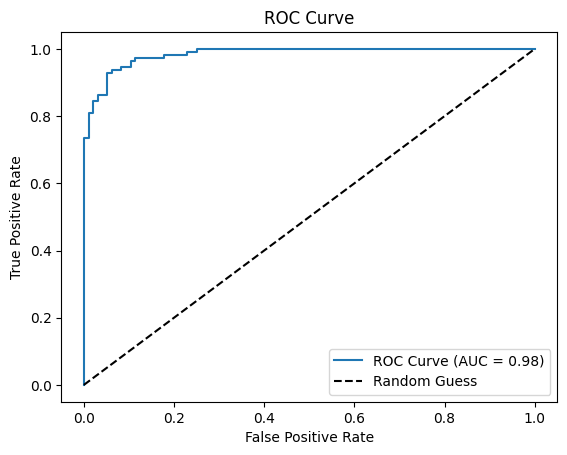

In [24]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

* Kurva ROC menunjukkan performa model yang sangat baik dengan AUC sebesar 0.98, menandakan kemampuan tinggi dalam membedakan kelas positif dan negatif.